## HW2
### Take-aways:

This hw2 starts with **forward-pass network**, which gives us the value of neural network with 1 hidden layer (activation function: relu) and the output layer(activation function: sigmoid).

Then we use **Gradient Descent** to find the decreasing direction along target function f, and visualize the trajectory. Plus: **Gradient Descent with Momentum**.

However, there would make no feedback with only forward-pass or just move with gradient descent.(may get stuck somewhere)

So, we applied **Gradient Descent to loss function**, in order to find the minimum of loss. Plus: **Gradient Descent with Momentum for loss function**. Record the trajectory of parameters and loss values.

### 1.3 forward-pass function in python 

In [1]:
import numpy as np

In [2]:
def relu(z):
    return max(0,z)

def sigmoid(z):
    #sigmoid activation function
    return 1/(1+np.exp(-z))

def nn_layer(X,W,b,f):
    vf = np.vectorize(f) #vectorize function -> map it to every element in np array
    return vf(np.dot(W,X)+b)

In [3]:
#main function
def ff_nn_ReLu(X, W_1, b_1, f_1, W_2, b_2, f_2):
    H = nn_layer(X, W_1, b_1, f_1)
    Y_hat = nn_layer(H, W_2, b_2, f_2)
    return Y_hat

In [4]:
#write test case

In [5]:
#layer 1
I = np.array([[1],[-1]]);
W = np.array([[1,0],[0,1],[0,2],[1,3]])
b_1 = np.array([[0.5],[0.1],[0.3],[0.2]])
H = nn_layer(I,W,b_1,relu)
H

array([[1.5],
       [0. ],
       [0. ],
       [0. ]])

In [6]:
#layer 2
V = np.array([[0.3],[0.1],[0.5],[0.7]])
b_2 = np.array([0.6])
nn_layer(H,V.T,b_2,sigmoid)

array([[0.7407749]])

In [7]:
#overall
ff_nn_ReLu(I,W,b_1,relu,V.T,b_2,sigmoid)

array([[0.7407749]])

### 1.4 What's the output given a set of weight matrices

In [8]:
X = np.array([[1,-1],[0,-1],[0,1]])
W_1 = np.array([[1,-1,0,1],[0,0,0.5,1]])
b_1 = np.array([[0],[0],[1],[0]])
V = np.array([[1],[0],[-1],[1]])
c = np.array([1])

In [9]:
X.shape

(3, 2)

In [10]:
for i in X:
    I = i.reshape(2,1)
    output = ff_nn_ReLu(I,W_1.T,b_1,relu,V.T,c,sigmoid)
    print(output)

[[0.81757448]]
[[0.73105858]]
[[0.73105858]]


**Comments:**
The class probabilities for each sample is 0.82, 0.73, 0.73. If 0.5 is chosen as a threshold, then these three samples are all classified as class 1.

### 2.2 Viz for contours of function f

In [11]:
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
#from matplotlib import cm

<Figure size 432x288 with 0 Axes>

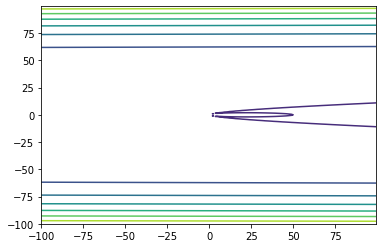

In [12]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
X = np.arange(-100, 100, 0.5)
Y = np.arange(-100, 100, 0.5)
X, Y = np.meshgrid(X, Y)
Z = (3-X**3) + 50*(2*Y**2-X)**2
#cset = ax.contour(X, Y, Z, cmap=cm.coolwarm)
#ax.clabel(cset, fontsize=9, inline=1)
#fig.colorbar(surf, shrink=0.5, aspect=5)
#plt.show()
fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z)

### 2.3 Find minimum with Gradient Descent

In [13]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*(x**2)-200*(y**2)+100*y
    df_dy = 400*y*(2*(y**2)-x)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=2):
    # your code here
    # be sure to store and return the entire trajectory -- i.e. the results at
    # each step -- as a list or array
    if starting_point is None:
        point = np.random.uniform(-2,2,size=2)
    else:
        point = starting_point
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

Try different learning rates, and find that the direction at some point could go to infinity always.

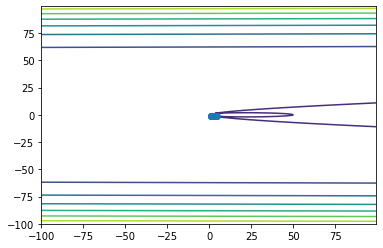

In [14]:
np.random.seed(10)
traj = grad_descent(starting_point=np.array([1,-1]),iterations=20, learning_rate=0.0005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

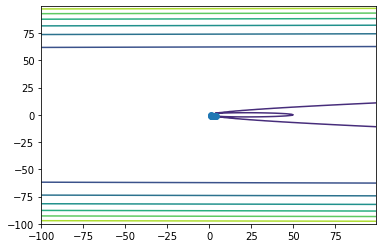

In [15]:
traj = grad_descent(starting_point=np.array([1,-1]),iterations=10, learning_rate=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

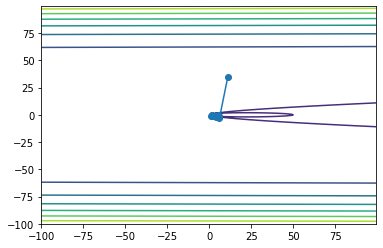

In [16]:
traj = grad_descent(starting_point=np.array([1,-1]),iterations=10, learning_rate=0.002)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### 2.4 Find minimum with Gradient Descent + Momentum

Adding Momentum makes it more waving and circulating around some vanishing point around (0,0)

In [17]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=0.1):
    # epsilon is learning rate, alpha is momentum
    if starting_point is None:
        point = np.random.uniform(-2,2,size=2)
    else:
        point = starting_point
    
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + epsilon * grad
        point = point - v  #why is this should be - than + ? #negative direction of gradient descent
        trajectory.append(point)
    return np.array(trajectory)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


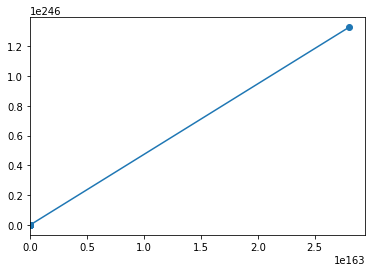

In [18]:
traj = grad_descent_with_momentum(iterations=20, epsilon=0.001, alpha=.5) #small momentum does something nice

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### 3.2 Write function of the gradient of Loss

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def binary_xent_residual(y, y_hat):
    # dL_dYhat
    return (y/y_hat - (1-y)/(1-y_hat))

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11,w_12, w_13, w_14],[w_21,w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))

In [21]:
W = np.random.randn(8).reshape((4,2))
b = np.random.randn(4)
v = np.random.randn(4)
c = np.random.randn(1)

In [22]:
def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a))
    
    dL_dv3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,2])
    dL_dv4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,3])
    dL_dv1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,0])
    dL_dv2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,1])
    
    dL_db1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]))
    dL_db2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]))
    dL_db3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]))
    dL_db4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]))

    dL_dw11 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,0])
    dL_dw12 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,0])
    dL_dw13 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,0])
    dL_dw14 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,0])

    dL_dw21 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,1])
    dL_dw22 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,1])
    dL_dw23 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,1])
    dL_dw24 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,1])
    
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw14, dL_dw21, dL_dw22, dL_dw23, dL_dw24,
                     dL_db1, dL_db2, dL_db3, dL_db4, dL_dv1, dL_dv2, dL_dv3, dL_dv4,dL_dc])

### 3.3 Generate synthetic XOR pattern

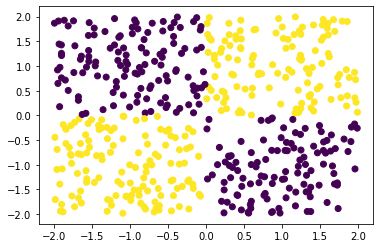

In [23]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y = np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

### 3.4 Use Gradient Descent and Track Loss

In [24]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=17).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

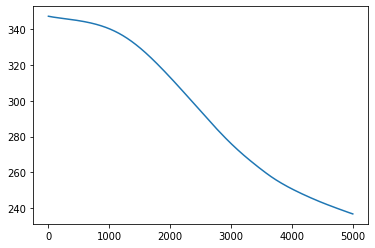

In [25]:
traj, losses = grad_descent(x, y, iterations=5000,learning_rate=1e-2)
plt.plot(losses)

In [27]:
traj

array([[-0.03399843, -0.05189172,  0.02159146, ...,  0.04107365,
         0.08872104, -0.07287184],
       [-0.03401976, -0.05187588,  0.02158217, ...,  0.04107265,
         0.08878992, -0.07256101],
       [-0.03404108, -0.05186017,  0.02157288, ...,  0.04107166,
         0.08885903, -0.07225098],
       ...,
       [-0.61168528, -1.21454515,  0.01741346, ...,  0.04078814,
         1.51727282, -0.02823873],
       [-0.61177344, -1.21476956,  0.01741346, ...,  0.04078814,
         1.5174592 , -0.02819827],
       [-0.61186161, -1.21499396,  0.01741346, ...,  0.04078814,
         1.51764555, -0.02815783]], dtype=float128)

### 3.4 Gradient Descent with Momentum

In [28]:
def grad_descent_with_mom(x, y,  iterations=10, epsilon=-2, alpha = 0.9):
    point = np.random.uniform(-.1,.1,size=17).astype("float64")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    v = np.zeros(point.size)
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

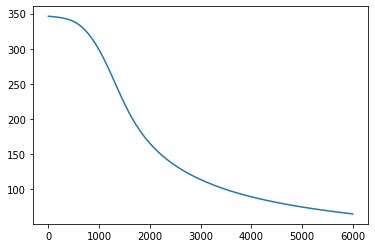

In [33]:
traj, losses = grad_descent_with_mom(x, y, iterations=6000, epsilon=-0.01, alpha=.5 )
plt.plot(losses)

### Final Decision Boundary

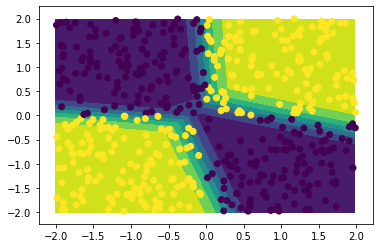

In [34]:
delta = 0.025
x1 = np.arange(-2.0, 2.0,  delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)